In [1]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [4]:
# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Pretrained ResNet50 모델
        self.network = models.resnet50(pretrained=False)  # 사전 학습 사용 안 함
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, xb):
        return self.network(xb)

# 모델 클래스 정의
model = ResNet(num_classes=6)  # 클래스 수를 동일하게 설정

# 가중치 로드 (CPU 환경에서 로드)
model.load_state_dict(torch.load('MyModel_weights.pth', map_location=torch.device('cpu')))
model.eval()  # 평가 모드로 전환

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
dataset_classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def predict_image(img, model, classes=dataset_classes):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)  # 배치 차원 추가 (1, C, H, W)
    # 모델을 CPU로 강제 이동
    model = model.to(torch.device('cpu'))
    xb = xb.to(torch.device('cpu'))  # 입력 데이터도 CPU로 이동
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()], prob[0].item()

def predict_external_image(image_name):
    image = Image.open(Path('./img/' + image_name))

    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))  
    predicted_class, probability = predict_image(example_image, model)
    print(f"'{predicted_class}'")

C:\Users\Song\AppData\Local\Temp\ipykernel_23872\62410414.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('MyModel_weights.pth', map_lo

'plastic'


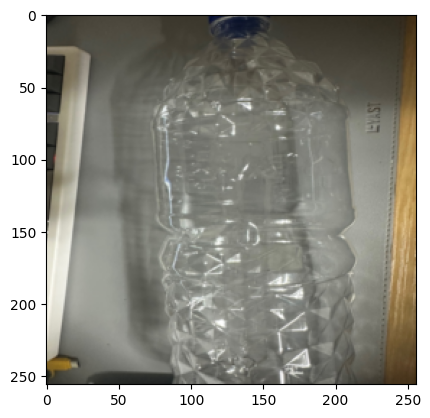

In [5]:
predict_external_image('test1.jpg')